## KS-test

In [1]:
import sys
sys.path.append('../')
from tsdr import tsdr
from tsdr.testseries import sockshop

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

0.027628 s-front-end_latency
0.000000 c-catalogue_last_seen
0.008703 s-user_latency
0.046661 s-front-end_latency
0.000000 c-user_memory_working_set_bytes
0.377731 s-orders_latency
0.119763 s-orders_latency02
0.076075 c-orders_network_receive_packets
0.000255 c-user_cpu_usage_seconds_total
0.513012 c-carts-db_memory_failures_total
0.000255 c-front-end_network_receive_packets_total
0.664751 s-front-end_throughput
0.000000 c-orders_memory_usage_bytes
0.015788 c-shipping_fs_reads_bytes_total


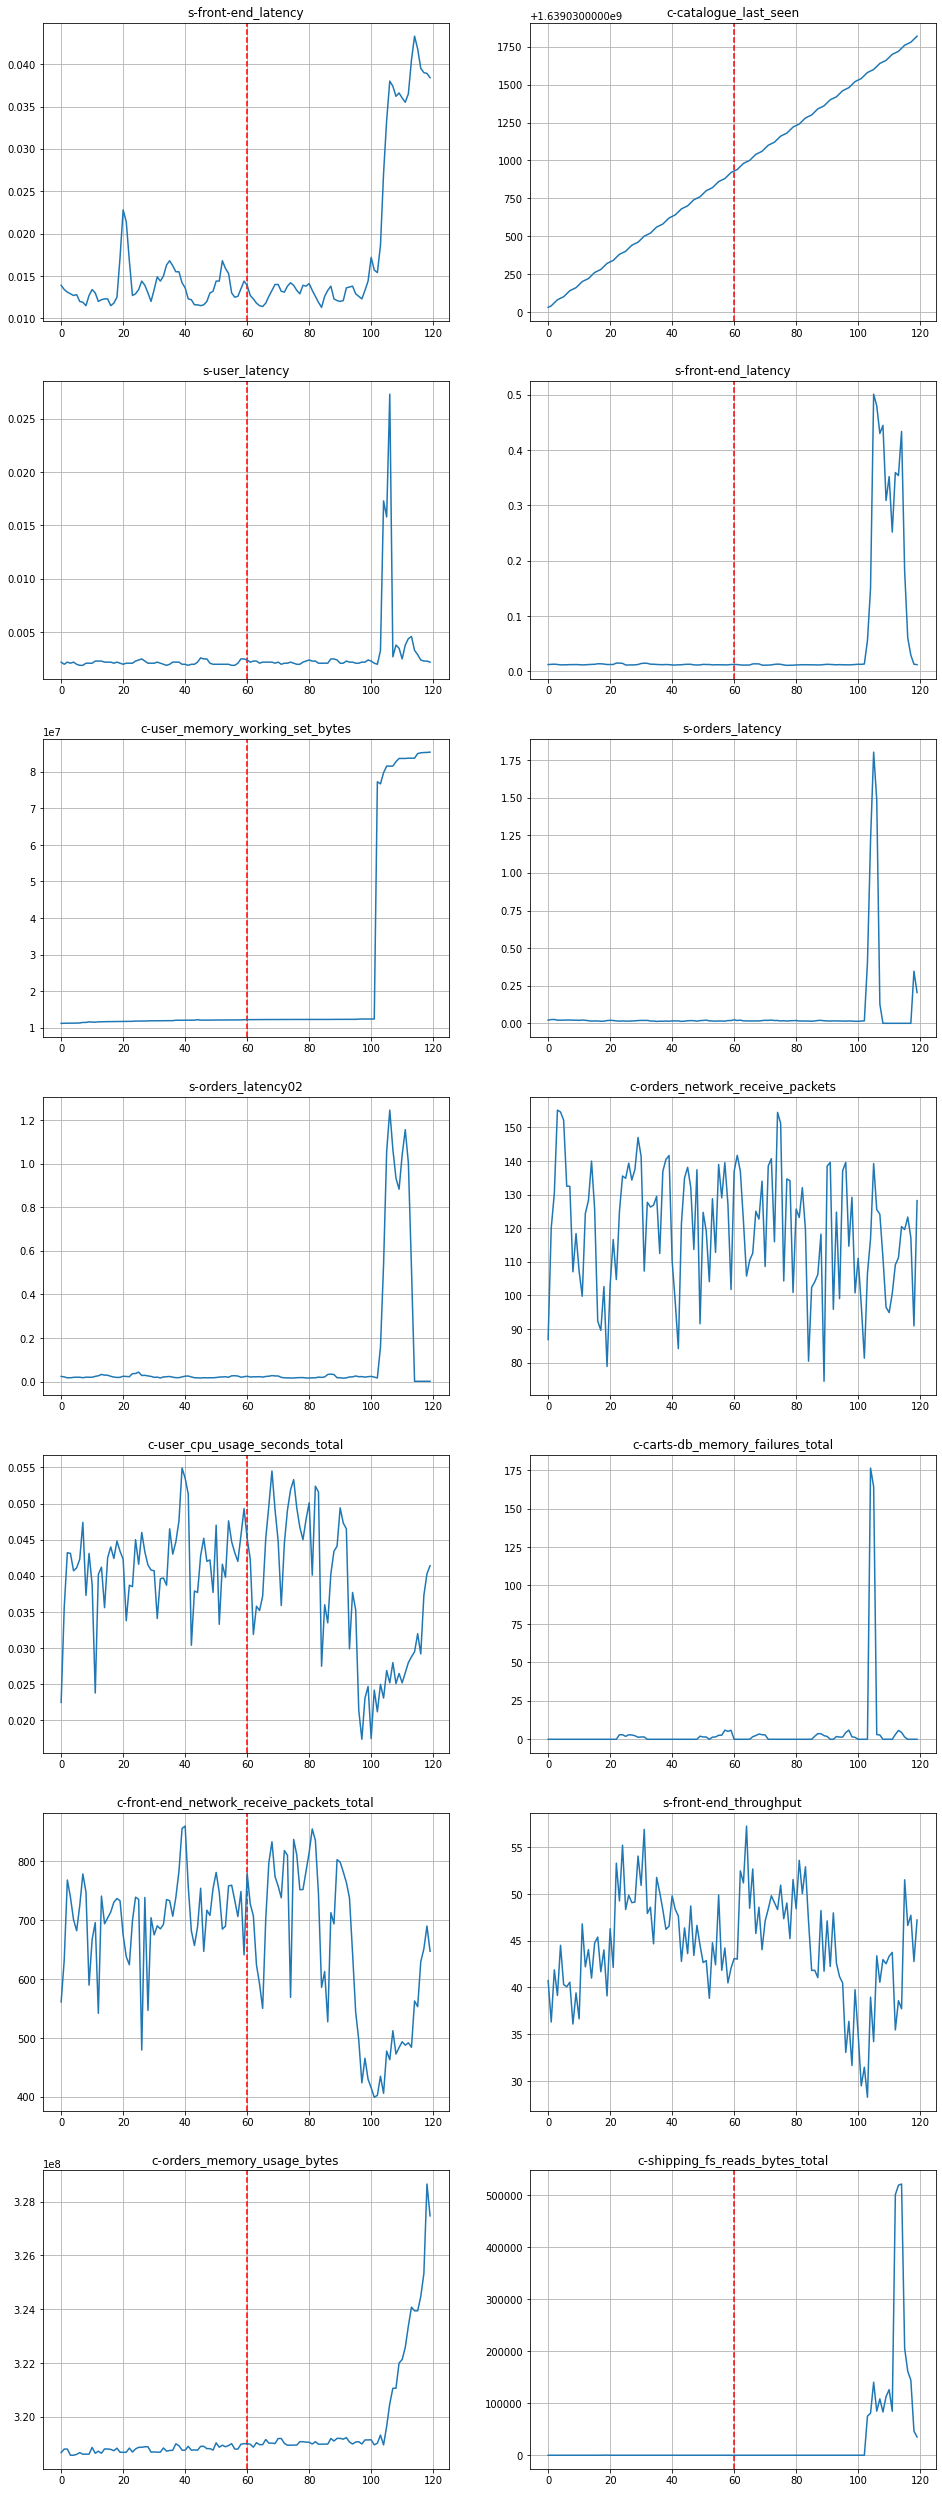

In [2]:
cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//2, ncols=2)
fig.set_size_inches(16, 3*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ts = np.array(case['datapoints'])
    train_ts, test_ts = np.split(ts, 2)

    pval = scipy.stats.ks_2samp(train_ts, test_ts).pvalue
    if pval <= 0.05:
        ax.axvline(train_ts.size, color='red', linestyle='dashed', label='breaks')
    print(f"{pval:5f}", case['name'])

    ax.set_title(case['name'])
    ax.plot(ts)
    ax.grid()

In [ ]:
# Anderson-Darling test